# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**HARMONY, MNCUBE**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler as SS
from sklearn.preprocessing import MinMaxScaler as MMS
from collections import Counter
from scipy.stats import boxcox

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('df_train.csv') # load the data
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [3]:
# # Print column names and data types
# for column_name, data_type in df.dtypes.items():
#     print(f"{column_name} ->: {data_type}")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [5]:
#Exclude all none continous columns and our predict(y) feature
cont_columns = [
    'Barcelona_pressure',
    'Barcelona_rain_1h',
    'Barcelona_rain_3h',
    'Barcelona_temp',
    'Barcelona_temp_max',
    'Barcelona_temp_min',
    'Barcelona_weather_id',
    'Barcelona_wind_deg',
    'Barcelona_wind_speed',
    'Bilbao_clouds_all',
    'Bilbao_pressure',
    'Bilbao_rain_1h',
    'Bilbao_snow_3h',
    'Bilbao_temp',
    'Bilbao_temp_max',
    'Bilbao_temp_min',
    'Bilbao_weather_id',
    'Bilbao_wind_deg',
    'Bilbao_wind_speed',
    'Madrid_clouds_all',
    'Madrid_humidity',
    'Madrid_pressure',
    'Madrid_rain_1h',
    'Madrid_temp',
    'Madrid_temp_max',
    'Madrid_temp_min',
    'Madrid_weather_id',
    'Madrid_wind_speed',
    'Seville_clouds_all',
    'Seville_humidity',
    'Seville_pressure',
    'Seville_rain_1h',
    'Seville_rain_3h',
    'Seville_temp',
    'Seville_temp_max',
    'Seville_temp_min',
    'Seville_weather_id',
    'Seville_wind_speed',
    'Valencia_humidity',
    'Valencia_pressure',
    'Valencia_snow_3h',
    'Valencia_temp',
    'Valencia_temp_max',
    'Valencia_temp_min',
    'Valencia_wind_deg',
    'Valencia_wind_speed'
]

cat_columns = ['Valencia_wind_deg','Seville_pressure']

#Remove Categorical Data
numeric_columns = [column for column in cont_columns if column not in cat_columns ]

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 

<div align="left" style="width: 500px; font-size: 80%; text-align: left; margin: 0 auto">
<img src="https://github.com/Explore-AI/Pictures/blob/f3aeedd2c056ddd233301c7186063618c1041140/regression_analysis_notebook/skew.jpg?raw=True"
     alt="Dummy image 1"
     style="float: left; padding-bottom=0.5em"
     width=500px/>
</div>


In [6]:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [7]:
df[numeric_columns].skew()

Barcelona_pressure      57.979664
Barcelona_rain_1h        8.726988
Barcelona_rain_3h       12.696605
Barcelona_temp           0.128095
Barcelona_temp_max       0.276925
Barcelona_temp_min      -0.018057
Barcelona_weather_id    -2.584011
Barcelona_wind_deg      -0.180001
Barcelona_wind_speed     1.057331
Bilbao_clouds_all       -0.053085
Bilbao_pressure         -0.999642
Bilbao_rain_1h           5.222802
Bilbao_snow_3h          26.177568
Bilbao_temp              0.293686
Bilbao_temp_max          0.393932
Bilbao_temp_min          0.194912
Bilbao_weather_id       -1.234844
Bilbao_wind_deg          0.226927
Bilbao_wind_speed        1.716914
Madrid_clouds_all        1.246745
Madrid_humidity         -0.057378
Madrid_pressure         -1.850768
Madrid_rain_1h           7.074308
Madrid_temp              0.304123
Madrid_temp_max          0.298707
Madrid_temp_min          0.275083
Madrid_weather_id       -3.107722
Madrid_wind_speed        1.441144
Seville_clouds_all       1.814452
Seville_humidi

**Kurtosis** 
- is the measure of outliers present in the data. High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers

In [8]:
df[numeric_columns].kurtosis()

Barcelona_pressure      3687.564230
Barcelona_rain_1h        101.578931
Barcelona_rain_3h        187.800460
Barcelona_temp            -0.696555
Barcelona_temp_max        -0.728757
Barcelona_temp_min        -0.474890
Barcelona_weather_id       5.701882
Barcelona_wind_deg        -0.959160
Barcelona_wind_speed       1.493635
Bilbao_clouds_all         -1.533417
Bilbao_pressure            1.825323
Bilbao_rain_1h            32.904656
Bilbao_snow_3h           806.128471
Bilbao_temp               -0.086363
Bilbao_temp_max            0.283366
Bilbao_temp_min           -0.230342
Bilbao_weather_id          0.067814
Bilbao_wind_deg           -1.083530
Bilbao_wind_speed          3.631565
Madrid_clouds_all          0.142079
Madrid_humidity           -1.167537
Madrid_pressure            2.216199
Madrid_rain_1h            76.584491
Madrid_temp               -0.612299
Madrid_temp_max           -0.662861
Madrid_temp_min           -0.666646
Madrid_weather_id          9.259047
Madrid_wind_speed          2

- Barcelona_pressure, Barcelona_rain_1h, and Barcelona_rain_3h have very high positive kurtosis values, indicating heavy tails in their distributions.

- Barcelona_temp, Barcelona_temp_max, and Barcelona_temp_min have negative kurtosis values close to zero, indicating approximately normal distributions.

- Bilbao_snow_3h, Bilbao_rain_1h, and Seville_rain_3h have very high positive kurtosis values, indicating heavy tails in their distributions.

- Madrid_weather_id, Seville_weather_id, and Valencia_snow_3h have positive kurtosis values above 5, indicating very heavy tails in their distributions.

- Valencia_wind_speed has a very high positive kurtosis value, indicating a heavy-tailed distribution.

In [9]:
def calculate_variance(df_column):
    variances = df_column.var()
    return variances

def get_columns_with_kurtosis(kurtosis):
    greater_than_3 = {}
    less_than_3 = {}
    within_3_units = {}
    
    for column, value in kurtosis.items():
        if value > 3:
            greater_than_3[column] = value
        elif value < -3:
            less_than_3[column] = value
        else:
            within_3_units[column] = value
    
    return greater_than_3, less_than_3, within_3_units

# Plot feature distributions
def plot(columns_to_plot):
    n = len(columns_to_plot)
    nrows = (n + 1) // 2  # Number of rows in the subplot grid
    ncols = min(2, n)  # Number of columns in the subplot grid, maximum 2
    #     if nrows//2 > 6:
    #         for i in range(nrows//6):
                   
    df[columns_to_plot].plot(kind='kde', subplots=True, layout=(nrows, ncols), sharex=False, figsize=(14, 10))
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()

In [10]:
# Call the function with the DataFrame df
kurt = df[numeric_columns].kurtosis()
greater_than_3, less_than_3, within_3_units = get_columns_with_kurtosis(kurt)

Barcelona_temp : -0.6965548392192273
Barcelona_temp_max : -0.728757385641762
Barcelona_temp_min : -0.47488983864511214
Barcelona_wind_deg : -0.9591599001218869
Barcelona_wind_speed : 1.4936353085879928
Bilbao_clouds_all : -1.5334170123998256
Bilbao_pressure : 1.8253225485015836
Bilbao_temp : -0.0863625314948342
Bilbao_temp_max : 0.2833664892986216
Bilbao_temp_min : -0.2303421161293615
Bilbao_weather_id : 0.06781438947623064
Bilbao_wind_deg : -1.0835298590634024
Madrid_clouds_all : 0.14207863141425037
Madrid_humidity : -1.167537310965867
Madrid_pressure : 2.216199344232205
Madrid_temp : -0.612298600304205
Madrid_temp_max : -0.6628611401473941
Madrid_temp_min : -0.6666462398271551
Madrid_wind_speed : 2.0364621246675885
Seville_clouds_all : 2.1559210977967203
Seville_humidity : -1.017982770351452
Seville_temp : -0.5041322882243198
Seville_temp_max : -0.5159894754947327
Seville_temp_min : -0.47556416483549313
Seville_wind_speed : 1.398579537584049
Valencia_humidity : -0.7343454982297355
Va

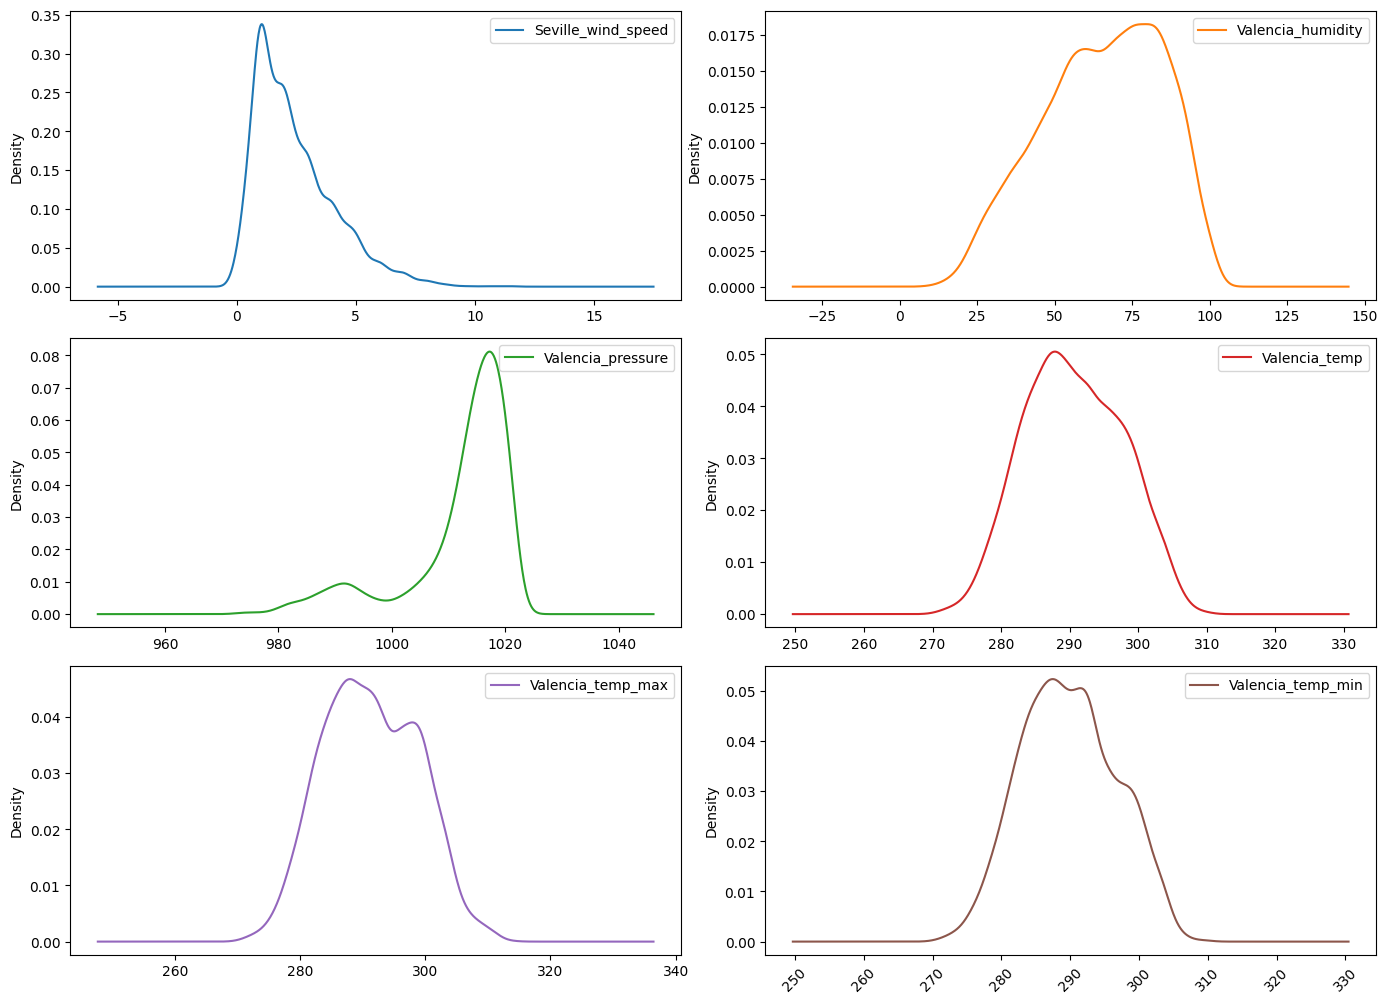

In [11]:
# Print the variances
for i,j in within_3_units.items():
    print(f"{i} : {j}")

columns_to_plot = list(within_3_units.keys())

# Limit the columns to plot to a maximum of 6
plot(columns_to_plot[-6:])

In [12]:
# Print the variances
for i,j in greater_than_3.items():
    print(f"{i} : {j}")

Barcelona_pressure : 3687.5642300069417
Barcelona_rain_1h : 101.5789308218838
Barcelona_rain_3h : 187.8004595033525
Barcelona_weather_id : 5.701881572742422
Bilbao_rain_1h : 32.90465647123472
Bilbao_snow_3h : 806.1284706376119
Bilbao_wind_speed : 3.6315653270441643
Madrid_rain_1h : 76.5844913665545
Madrid_weather_id : 9.25904651532839
Seville_rain_1h : 93.84074607373714
Seville_rain_3h : 413.1365923500452
Seville_weather_id : 10.710308129580135
Valencia_snow_3h : 4089.323165482344
Valencia_wind_speed : 35.645426386267474


In [13]:
columns_to_plot = list(greater_than_3.keys())

In [14]:
len(columns_to_plot)

14

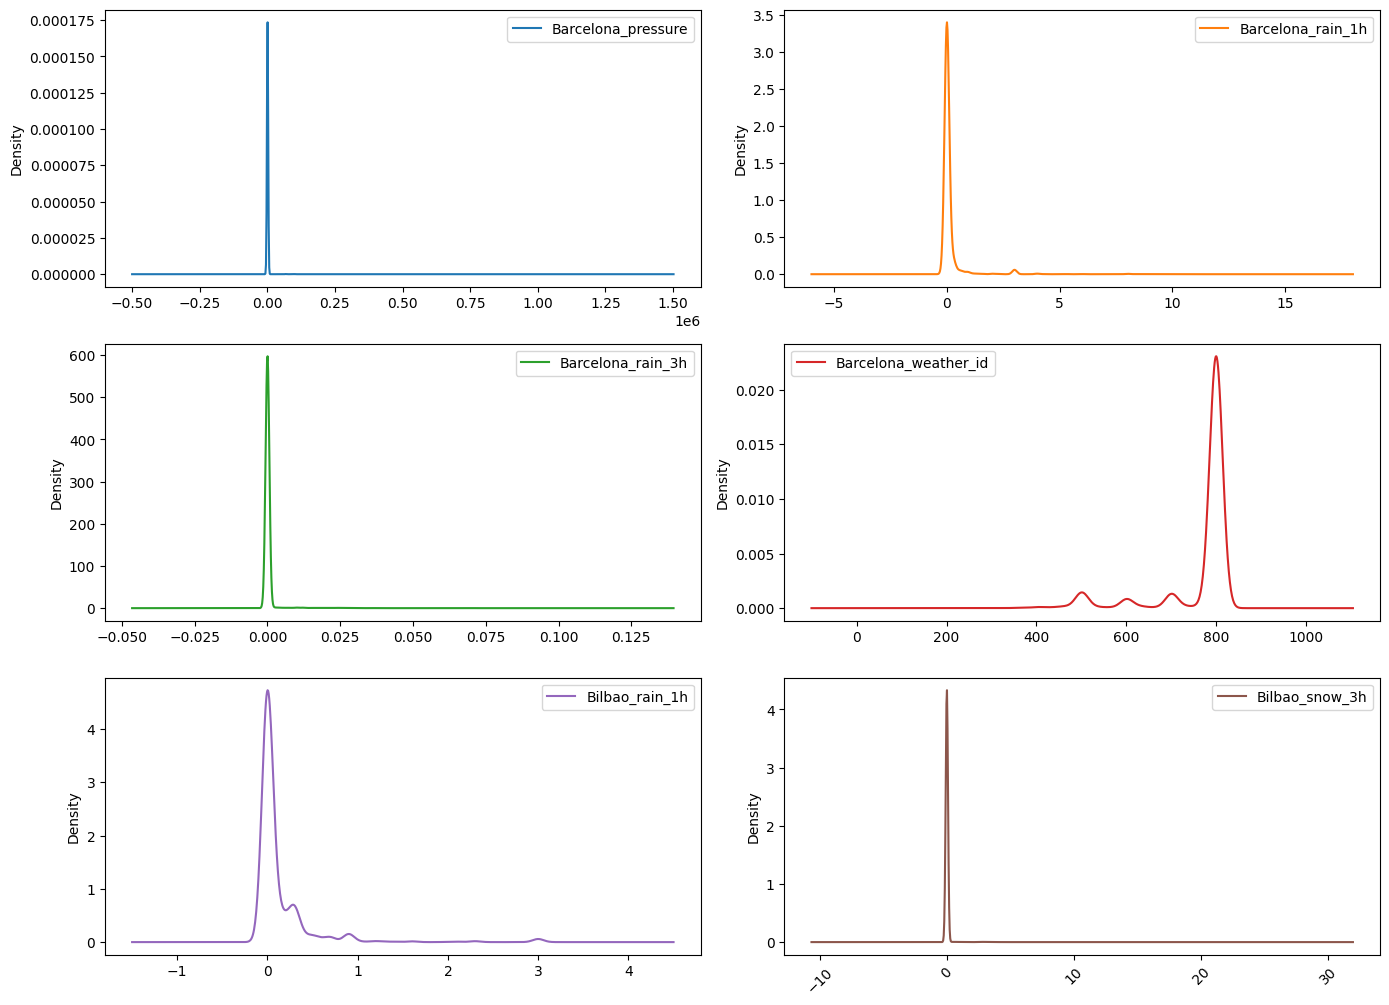

In [15]:
# Limit the columns to plot to a maximum of 6
plot(columns_to_plot[:6])

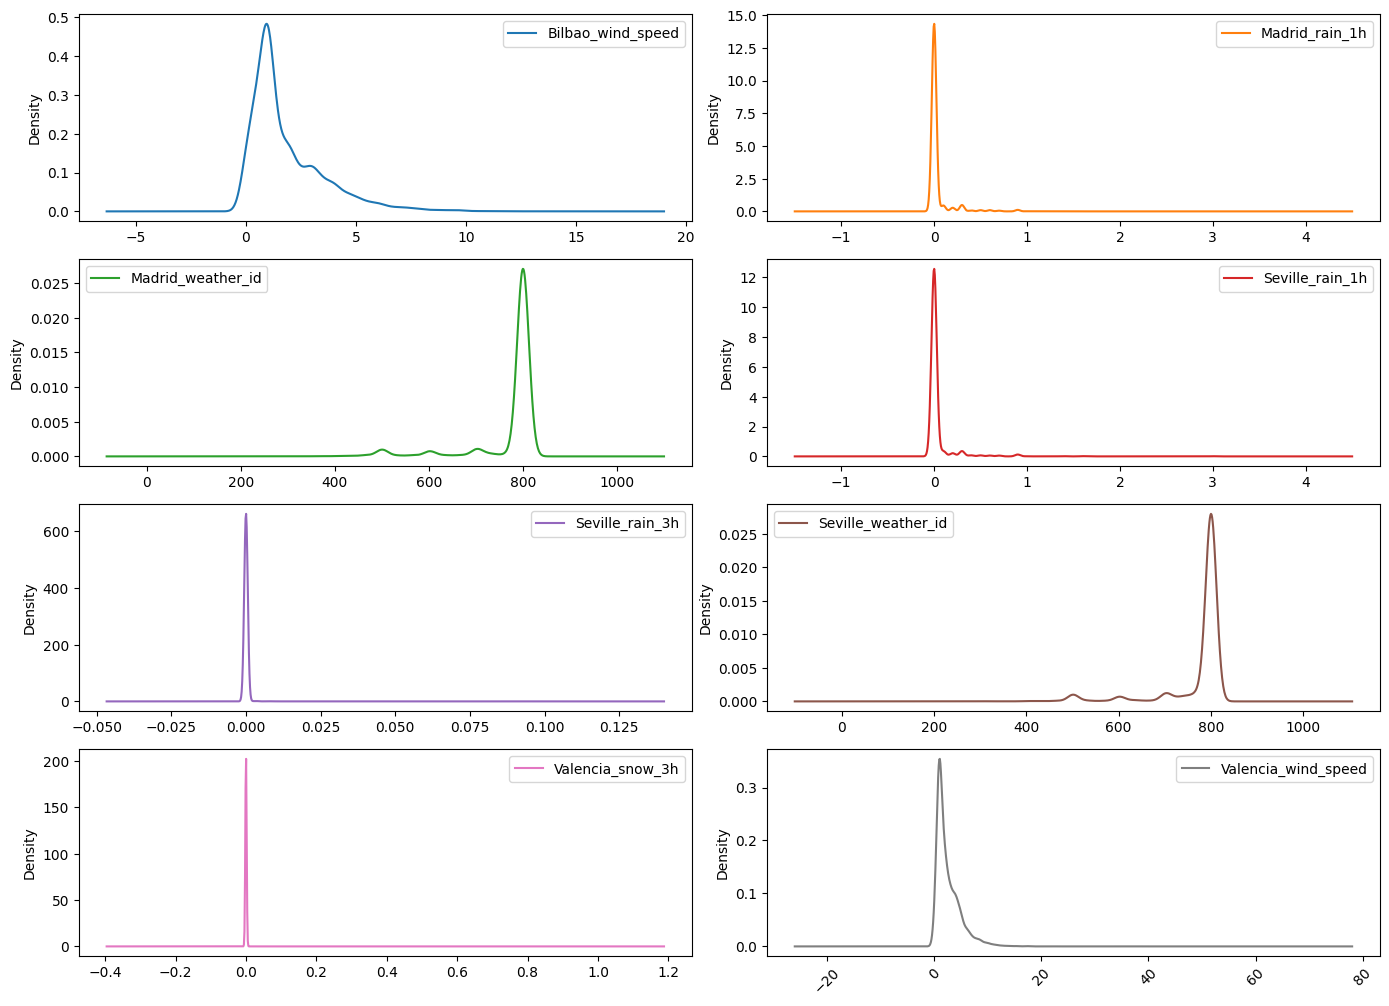

In [16]:
plot(columns_to_plot[6:])

### Conclusions drawn from columns with kurtosis greater than 3

- Barcelona_pressure, Barcelona_rain_1h, Barcelona_rain_3h, Barcelona_weather_id, Bilbao_rain_1h, Bilbao_snow_3h, Bilbao_wind_speed, Madrid_rain_1h, Madrid_weather_id, Seville_rain_1h, Seville_rain_3h, Seville_weather_id, Valencia_snow_3h, and Valencia_wind_speed exhibit heavy-tailed distributions.

- These columns may have a higher concentration of extreme values or outliers compared to a normal distribution.

- The presence of heavy tails in the distributions suggests that these variables have a higher potential for extreme observations, which may impact the model's performance and assumptions.

- It might be beneficial to investigate and handle these extreme values or outliers appropriately in the data preprocessing or modeling phase.

- Further exploratory data analysis and outlier detection techniques can be applied to gain a deeper understanding of these variables and their impact on the analysis or modeling tasks

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [33]:
###--------------------------------------------look at data statistics-----------------------------------------------------###
#--------------------------------------------=====apply_boxcox_transform=====------------------------------------------------#
### START FUNCTION
def apply_boxcox_transform(df, columns, threshold=10):
    transformed_df = df.copy()
    for column in columns:
        transformed_data, lambda_val = boxcox(df[column])
        transformed_df[column] = transformed_data
        print(f"Applied Box-Cox transformation to column '{column}' with lambda={lambda_val:.4f}")    
    return transformed_df
### END FUNCTION
#---------------------------------------------=====get_skewed_columns=====---------------------------------------------------#
### START FUNCTION
def get_skewed_columns(column_names, threshold=1):
    skewed_columns = []
    skewness = df[column_name].skew()
    for column_name, skew_value in skewness.iteritems():
        if skew_value > threshold or skew_value < -threshold:
            skewed_columns.append(column_name)
    return skewed_columns
### END FUNCTION
###---------------------------------------------=====get_outliers=====-----------------------------------------------------###
### START FUNCTION
def get_outliers(columns):
    outlier_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outlier_dict[column] = outliers.tolist()
    return outlier_dict
### END FUNCTION
#--------------------------------------------------Analyse Outliers----------------------------------------------------------#
### START FUNCTION
def analyze_outliers(outlier_dict):
    analysis_dict = {}
    for column, outliers in outlier_dict.items():
        if len(outliers) > 0:
            min_outlier = min(outliers)
            max_outlier = max(outliers)
            mean_outlier = np.mean(outliers)
            std_outlier = np.std(outliers)
            analysis_dict[column] = {
                'min_outlier': min_outlier,
                'max_outlier': max_outlier,
                'mean_outlier': mean_outlier,
                'std_outlier': std_outlier
            }
    return analysis_dict
### END FUNCTION
#---------------------------------------------=====group_columns_by_city=====------------------------------------------------#
### START FUNCTION
def group_columns_by_city(data_columns):
    split_list = []
    prev_variable = None
    temp_list = []
    for column in data_columns:
        variable = column.split('_')[0]
        if variable != prev_variable:
            if temp_list:
                split_list.append(temp_list)
                temp_list = []
        temp_list.append(column)
        prev_variable = variable
    if temp_list:
        split_list.append(temp_list)
    return split_list
### END FUNCTION
#---------------------------------------------=====plot_correlation_heatmap_many=====----------------------------------------#
### START FUNCTION
def plot_correlation_heatmap_many(columns):
    # Evaluate correlation
    corr = df[columns].corr()
    # Plot correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()
### END FUNCTION
#---------------------------------------------=====plot_correlation_heatmap_one=====-----------------------------------------#
### START FUNCTION
def plot_correlation_heatmap_one(df, list1, list2):
    # Calculate the correlation matrix
    corr_matrix = pd.DataFrame(index=list1, columns=list2)
    for col1, col2 in zip(list1, list2):
        corr_matrix.loc[col1, col2] = df[col1].corr(df[col2])

    # Convert the correlation matrix to numeric values
    corr_matrix = corr_matrix.astype(float)

    # Create the heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
### END FUNCTION
#---------------------------------------------=====plot_correlation_heatmap_one=====-----------------------------------------#
### START FUNCTION
def plot_graphs(columns):
    df[columns].plot(kind='kde', subplots=True, layout=(3, 2), sharex=False, figsize=(14, 10))
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.show()
### END FUNCTION
#-----------------------------------------=====descriptive_statistics_analysis=====------------------------------------------#
### START FUNCTION
def descriptive_statistics_analysis(df):
    # Calculate descriptive statistics
    statistics = df.describe()

    # Calculate additional statistics
    statistics.loc['skewness'] = df.skew()
    statistics.loc['kurtosis'] = df.kurtosis()

    # Return the descriptive statistics
    return statistics
### END FUNCTION
#----------------------------------------------------------=====pairwise=====------------------------------------------------#
### START FUNCTION
def pairwise(columns):
    g = sns.pairplot(df[columns], diag_kind="kde")
    g.map_lower(sns.kdeplot, levels=4, color=".2")
### END FUNCTION
#----------------------------------=====seperated the coumns into respective features=====-----------------------------------#
wind_speed = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Seville_wind_speed', 'Barcelona_wind_speed','load_shortfall_3h']
wind_degree = ['Valencia_wind_deg', 'Bilbao_wind_deg', 'Barcelona_wind_deg']
rain_1h = ['Bilbao_rain_1h', 'Seville_rain_1h', 'Barcelona_rain_1h', 'Madrid_rain_1h']
rain_3h = ['Seville_rain_3h', 'Barcelona_rain_3h', 'load_shortfall_3h']
humidity = ['Seville_humidity', 'Madrid_humidity', 'Valencia_humidity', 'load_shortfall_3h']
clouds_all = ['Seville_clouds_all','Madrid_clouds_all','Bilbao_clouds_all', 'load_shortfall_3h']
pressure = ['Seville_pressure', 'Barcelona_pressure', 'Valencia_pressure', 'Madrid_pressure','load_shortfall_3h']
snow_3h = ['Bilbao_snow_3h', 'Valencia_snow_3h', 'load_shortfall_3h']
weather_id = ['Bilbao_weather_id', 'Serville_weather_id', 'Barcelona_weather_id', 'Madrid_weather_id', 'load_shortfall_3h']
temp_max = ['Bilbao_temp_max', 'Seville_temp_max', 'Madrid_temp_max', 'Barcelona_temp_max', 'Valencia_temp_max', 'load_shortfall_3h']
temp_min = ['Bilbao_temp_min', 'Seville_temp_min', 'Madrid_temp_min', 'Barcelona_temp_min', 'Valencia_temp_max', 'load_shortfall_3h']
temp = ['Bilbao_temp', 'Seville_temp', 'Madrid_temp', 'Barcelona_temp', 'Valencia_temp', 'load_shortfall_3h']
##############################################################################################################################

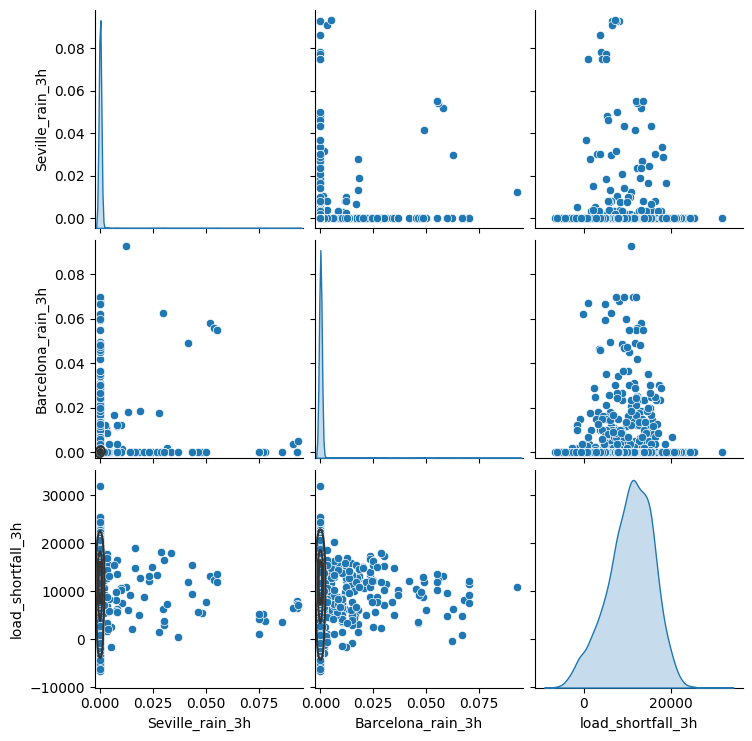

In [31]:
pairwise(rain_3h)

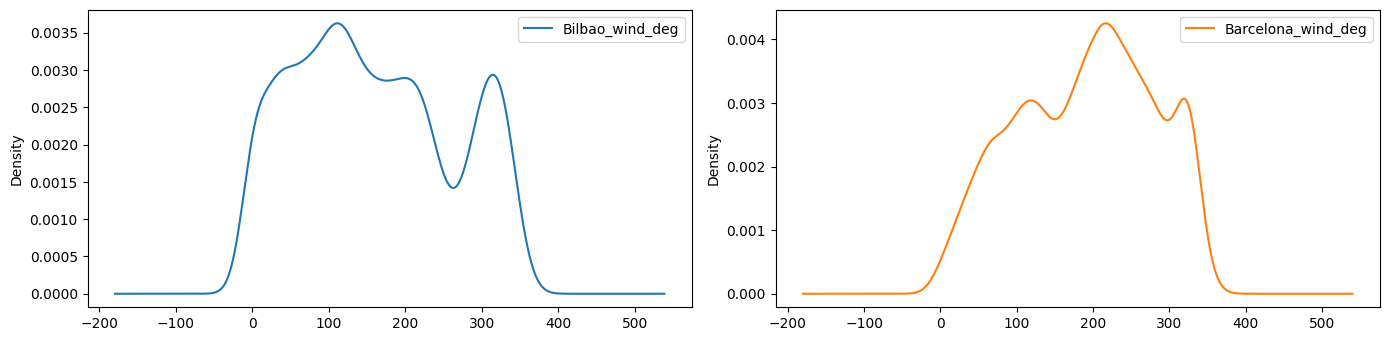

In [34]:
# Plot feature distributions
plot_graphs(wind_degree)

In [ ]:
# d = {}

# for sublist in split_list:
#     city = sublist[0].split("_", 1)[0]
#     variables = [item.split("_", 1)[1] for item in sublist]
#     d[city] = variables

# for city, features in d.items():
#     print(city, sorted(features), sep=":")
# # Find the maximum number of elements in any sublist
# max_len = max(len(sublist) for sublist in split_list)

# # Fill shorter sublists with None to match the length
# split_list = [sublist + [None] * (max_len - len(sublist)) for sublist in split_list]

# # Transpose the list of lists
# transposed = list(zip(*split_list))

# # Print the transposed list as columns
# for column in transposed:
#     print('\t'.join(str(element) for element in column))
# # Group the data by date and calculate the mean of the target variable (load_shortfall_3h)
# grouped_data = df.groupby('Season')['Valencia_pressure'].mean()

# # Increase the figure size
# plt.figure(figsize=(10, 6))

# # Convert month names to month numbers for sorting
# month_order = [calendar.month_name[i] for i in range(1, 13)]

# # Sort the grouped data by month order
# grouped_data = grouped_data.reindex(month_order)

# # Create a line plot for Valencia_pressure to see if it follows a linear pattenr of any sort
# plt.plot(grouped_data.index, grouped_data.values)
# plt.xlabel('Season')
# plt.xticks(rotation=45)
# plt.ylabel('Valencia Pressure')
# plt.title('Valencia Pressure Per Season')
# plt.show()

# # Create a box plot of the DataFrame
# plt.figure(figsize=(12, 6))  # Set the figure size
# df.boxplot()  # Create the box plot
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# plt.title('Spread of Data - Box Plot')  # Set the title of the plot
# plt.xlabel('Columns')  # Set the x-axis label
# plt.ylabel('Values')  # Set the y-axis label
# plt.show()  # Display the plot

# evaluate correlation
In a box plot, the small black diamonds, also known as outliers, represent individual data points that fall significantly outside the overall distribution of the data. These points are considered to be potential outliers, as they are located beyond the whiskers of the box plot.

Specifically, in a box plot:

    The box represents the interquartile range (IQR), which encompasses the middle 50% of the data.
    The horizontal line inside the box represents the median.
    The whiskers extend from the box and typically represent a range that includes most of the data.
    Any data points that fall outside the whiskers are considered outliers and are represented by the small black diamonds.

In [ ]:
# # First of,  the Valencia bla bla bla 
# # Define a custom sorting function
# def custom_sort(value):
#     # Extract the numeric part from the value
#     numeric_part = int(value[2:])
#     return numeric_part

# # Set the figure size
# plt.figure(figsize=(16, 10))

# # Apply the custom sorting function to the categorical values
# sorted_categories = sorted(df['Seville_pressure'], key = custom_sort)

# # Create a box plot
# sns.boxplot(x=sorted_categories, y='load_shortfall_3h', data=df)

# # Set labels and title
# plt.xlabel('Seville_pressure')
# plt.ylabel('load_shortfall_3h')
# plt.title('Box Plot of Seville_pressure by load_shortfall_3h')

# # Show the plot
# plt.show()

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [ ]:
###--------------------------------------------create neccessary methods/functions-----------------------------------------###
#------------------------------------------------remove missing values/ features---------------------------------------------#
### START FUNCTION
def check_null_values(df):
    """Returns a summary of null values in each column of a pandas DataFrame"""
    
    null_counts = df.isnull().sum()
    null_percentage = round(null_counts / len(df) * 100, 2)
    
    null_summary = pd.concat([null_counts, null_percentage], axis=1)
    null_summary.columns = ['# of Null Values', '% of Null Values']
    null_summary.sort_values(by='# of Null Values', ascending=False, inplace=True)
    return null_summary
### END FUNCTION

In [ ]:
###-------------------------------------------------Data Prunning----------------------------------------------------------###
df.drop("Unnamed: 0", axis=1, inplace=True)
#---------------------------------------------------create new features------------------------------------------------------#
df = df.rename(columns={'time': 'time_stamp'})
# Convert the date column to a pandas datetime object
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
#-------------------------------------------Separate the date from time str--------------------------------------------------#
df['date'] = df['time_stamp'].dt.date
df['Month'] = df['time_stamp'].dt.month
df['time'] = df['time_stamp'].dt.time
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
seasons = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall',
    'December': 'Winter'
}
#-------------------------------------------Map the months to seasons--------------------------------------------------------#
df['Month'] = df['Month'].map(month_names)
df['Season'] = df['Month'].map(seasons)
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].apply(lambda x: int(x.split('_')[1]))
#-------------------------------------------Fill missing values with the mean------------------------------------------------#
mean_pressure = df['Valencia_pressure'].mean()
df['Valencia_pressure'] = df['Valencia_pressure'].fillna(mean_pressure)

**Z-Score Normalization**
- (also known as standardization) transforms the features to have zero mean and unit variance. You can use the StandardScaler class from scikit-learn for this normalization.

In [ ]:
# # Select only the float columns in the DataFrame but except our predict feature
# float_columns = df.select_dtypes(include=['float']).columns

# # Create a MinMaxScaler object
# scaler = MinMaxScaler()

# # Apply Min-Max scaling to the float columns
# df[float_columns] = scaler.fit_transform(df[float_columns])

# max_val = df['Valencia_wind_deg'].max()
# min_val = df['Valencia_wind_deg'].min()

# print(f"Maximum value in Valencia_wind_deg column: {max_val}")
# print(f"Minimum value in Valencia_wind_deg column: {min_val}")


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
###---------------------------------------------------split data-----------------------------------------------------------###
#---------------------------------------create targets and features dataset--------------------------------------------------#
### START FUNCTION
def feature_response_split(data):
    X = data[:, 0]  # Extract all features columns
    y = data[:, 1]  # Extract the response column(shortfall)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return (X_train, y_train), (X_test, y_test)
### END FUNCTION
#-------------------------------------------create one or more ML models-----------------------------------------------------#
class RidgeRegression:
    def __init__(self, lambda_val=1.0):
        self.lambda_val = lambda_val
        self.coefficients = None

    def fit(self, X, y, method='analytical'):
        if method == 'analytical':
            self._fit_analytical(X, y)
        elif method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        elif method == 'stochastic_gradient_descent':
            self._fit_stochastic_gradient_descent(X, y)
        else:
            raise ValueError("Invalid method specified.")

    def predict(self, X):
        if self.coefficients is None:
            raise RuntimeError("Model has not been trained.")
        return np.dot(X, self.coefficients)

    def mse(self, X, y):
        y_pred = self.predict(X)
        return mean_squared_error(y, y_pred)

    def get_coefficients(self):
        return self.coefficients

    def _fit_analytical(self, X, y):
        n_features = X.shape[1]
        X_transpose_X = np.dot(X.T, X)
        self.coefficients = np.linalg.inv(whw + self.lambda_val * np.eye(n_features)).dot(X.T).dot(y)

    def _fit_gradient_descent(self, X, y, learning_rate=0.01, n_iterations=1000):
        n_samples, n_features = X.shape
        self.coefficients = np.zeros(n_features)

        for _ in range(n_iterations):
            predictions = np.dot(X, self.coefficients)
            errors = y - predictions
            gradient = -2 * np.dot(X.T, errors) + 2 * self.lambda_val * self.coefficients
            self.coefficients -= learning_rate * gradient

    def _fit_stochastic_gradient_descent(self, X, y, learning_rate=0.01, n_epochs=100, batch_size=1):
        n_samples, n_features = X.shape
        self.coefficients = np.zeros(n_features)

        for _ in range(n_epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                predictions = np.dot(X_batch, self.coefficients)
                errors = y_batch - predictions
                gradient = -2 * np.dot(X_batch.T, errors) + 2 * self.lambda_val * self.coefficients
                self.coefficients -= learning_rate * gradient

    def set_lambda(self, lambda_val):
        self.lambda_val = lambda_val
#--------------------------------------------evaluate one or more ML models--------------------------------------------------#


In [ ]:
# create targets and features dataset

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic
